<a href="https://colab.research.google.com/github/MishraShardendu22/Heart-Analysis-Machine-Learning/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import pandas as pd
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [65]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [67]:
# Check if there are dpulicated values.
df.duplicated().sum()

np.int64(0)

# **Histogram**: for numbers spread over a range (like age, height). It groups values into bins.
# **Count plot**: for categories (like yes/no, 0/1). It just counts how many of each.

# Binary data → **count plot**
# Continuous data → **histogram**

<Axes: xlabel='HeartDisease', ylabel='count'>

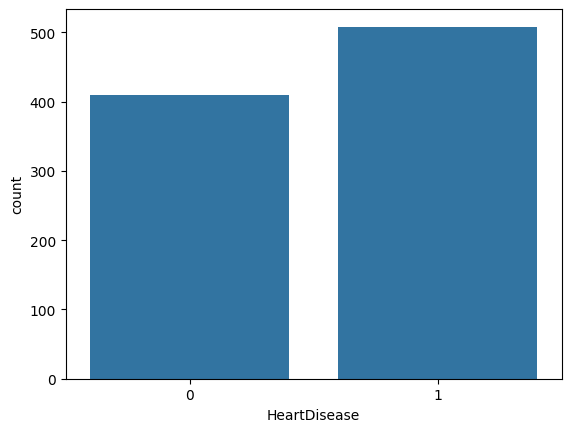

In [68]:
# Check if the data is properly distributed with respect to the Target Variable
sns.countplot(x=df["HeartDisease"])

# 400 No and 500 Yes almost similar.
# Thus ML Model will work properly.

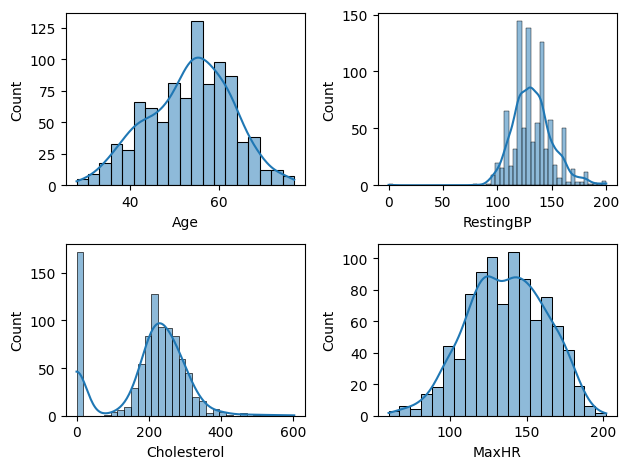

In [69]:
def plottingGraphs(columnValue, num):
    plt.subplot(2, 2, num)
    sns.histplot(df[columnValue], kde=True)

plottingGraphs("Age", 1)
plottingGraphs("RestingBP", 2)
plottingGraphs("Cholesterol", 3)
plottingGraphs("MaxHR", 4)

plt.tight_layout()

In [70]:
# Now Cholesterol can not be 0 so we need to replace that with mean value of that column values.
# Same for Resting BP it can not be 0.

print((df["RestingBP"] <= 0).sum())
print((df["Cholesterol"] <= 0).sum())

1
172


In [71]:
bpMean = df["RestingBP"].mean()
chlMean = df["Cholesterol"].mean()

df['Cholesterol'] = df['Cholesterol'].replace(0,chlMean)
df['Cholesterol'] = df['Cholesterol'].round(2)

df['RestingBP'] = df['RestingBP'].replace(0,bpMean)
df['RestingBP'] = df['RestingBP'].round(2)

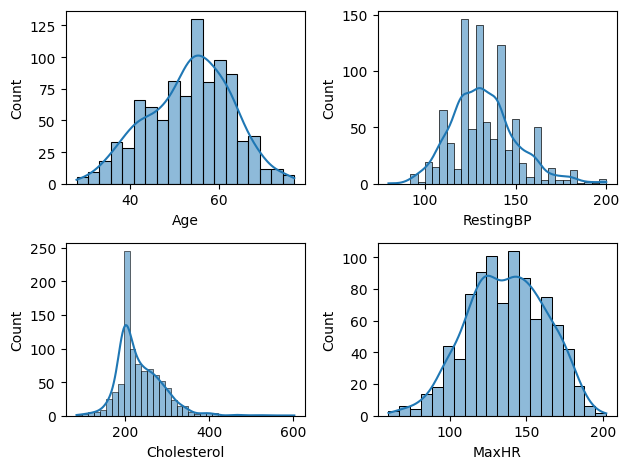

In [72]:
def plottingGraphs(columnValue, num):
    plt.subplot(2, 2, num)
    sns.histplot(df[columnValue], kde=True)

plottingGraphs("Age", 1)
plottingGraphs("RestingBP", 2)
plottingGraphs("Cholesterol", 3)
plottingGraphs("MaxHR", 4)

plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

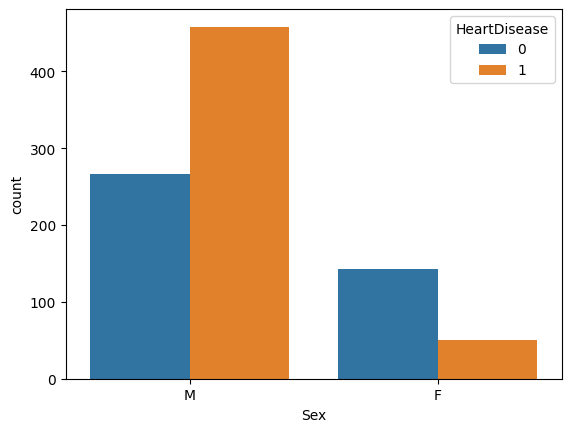

In [73]:
sns.countplot(x = df['Sex'],hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

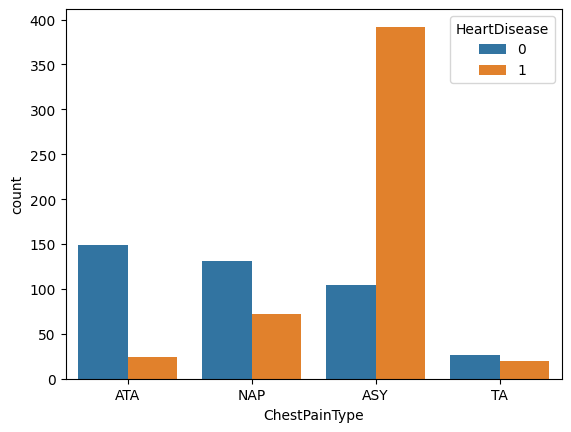

In [74]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

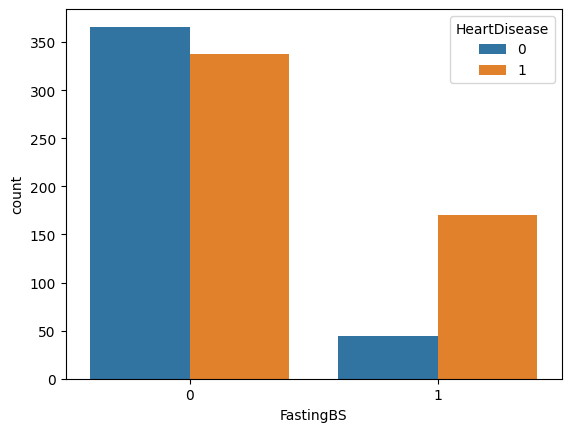

In [75]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

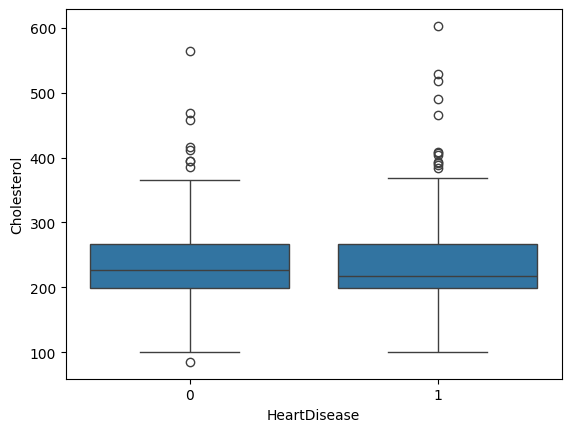

In [76]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

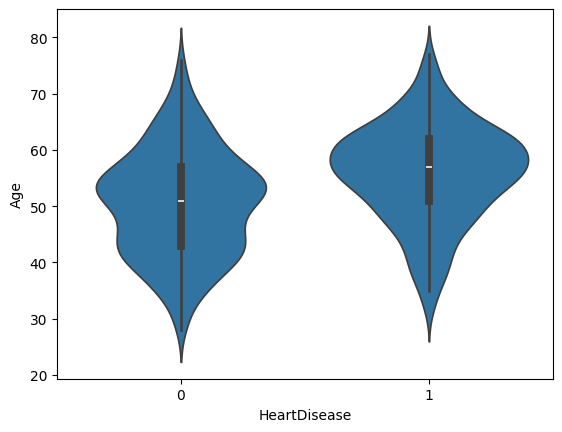

In [77]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

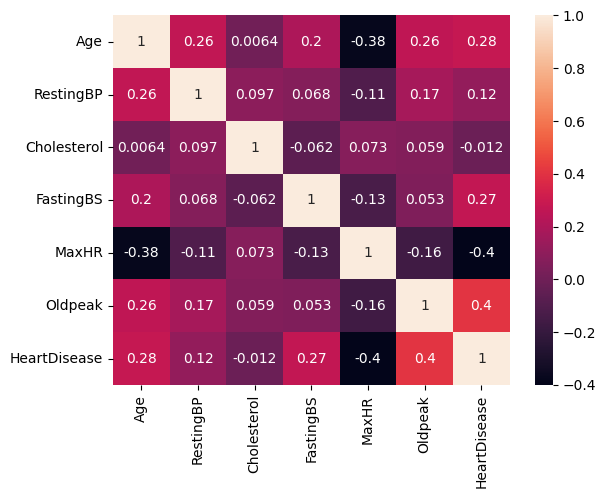

In [78]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [79]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode = df_encode.astype(int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [80]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.943031,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-0.992670,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.836478,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.388873,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.726289,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [90]:
import pickle

# Save the scaler
with open('heart_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the column names of X (features) as expected_columns
expected_columns = X.columns.tolist()
with open('heart_columns.pkl', 'wb') as file:
    pickle.dump(expected_columns, file)

print("Scaler and feature columns saved as 'heart_scaler.pkl' and 'heart_columns.pkl' respectively.")

Scaler and feature columns saved as 'heart_scaler.pkl' and 'heart_columns.pkl' respectively.


Now that all necessary components are saved, here's the updated Streamlit app code. I've changed `knn_heart_model.pkl` to `best_model.pkl` to use the best-performing Logistic Regression model. You can run this code in a Python environment with Streamlit installed (e.g., `streamlit run your_app.py` after saving this code as `your_app.py`).

In [92]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.1 MB/s eta 0:00:00


In [96]:
import streamlit as st
import pandas as pd
import joblib

# Load saved model, scaler, and expected columns
# Changed to best_model.pkl as Logistic Regression was the best performing model saved
model = joblib.load("best_model.pkl")
scaler = joblib.load("heart_scaler.pkl")
expected_columns = joblib.load("heart_columns.pkl")

st.title("Heart Disease Prediction by akarsh") # Changed to Heart Disease
st.markdown("Provide the following details to check your heart disease risk:")

# Collect user input
age = st.slider("Age", 18, 100, 40)
sex = st.selectbox("Sex", ["M", "F"])
chest_pain = st.selectbox("Chest Pain Type", ["ATA", "NAP", "TA", "ASY"])
resting_bp = st.number_input("Resting Blood Pressure (mm Hg)", 80, 200, 120)
cholesterol = st.number_input("Cholesterol (mg/dL)", 100, 600, 200)
faster_bs = st.selectbox("Fasting Blood Sugar > 120 mg/dL", [0, 1])
resting_ecg = st.selectbox("Resting ECG", ["Normal", "ST", "LVH"])
max_hr = st.slider("Max Heart Rate", 60, 220, 150)
exercise_angina = st.selectbox("Exercise-Induced Angina", ["Y", "N"])
oldpeak = st.slider("Oldpeak (ST Depression)", 0.0, 6.0, 1.0)
st_slope = st.selectbox("ST Slope", ["Up", "Flat", "Down"])

if st.button("Predict"):

    input_data = {col: 0 for col in expected_columns}

    input_data['Age'] = age
    input_data['RestingBP'] = resting_bp
    input_data['Cholesterol'] = cholesterol
    input_data['FastingBS'] = faster_bs
    input_data['MaxHR'] = max_hr
    input_data['Oldpeak'] = oldpeak

    if f'Sex_{sex}' in input_data: # Sex_M will be 1 for Male, 0 for Female
        input_data[f'Sex_{sex}'] = 1

    if f'ChestPainType_{chest_pain}' in input_data:
        input_data[f'ChestPainType_{chest_pain}'] = 1

    if f'RestingECG_{resting_ecg}' in input_data:
        input_data[f'RestingECG_{resting_ecg}'] = 1

    if f'ExerciseAngina_{exercise_angina}' in input_data:
        input_data[f'ExerciseAngina_{exercise_angina}'] = 1

    if f'ST_Slope_{st_slope}' in input_data:
        input_data[f'ST_Slope_{st_slope}'] = 1


    input_df = pd.DataFrame([input_data])
    input_df = input_df[expected_columns]
    scaled_input = scaler.transform(input_df)
    prediction = model.predict(scaled_input)[0]

    if prediction == 1:
        st.error("⚠️ High Risk of Heart Disease")
    else:
        st.success("✅ Low Risk of Heart Disease")

2026-01-06 20:10:13.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-06 20:10:13.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [81]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)

print('The best-performing model (Logistic Regression) has been saved as best_model.pkl')

The best-performing model (Logistic Regression) has been saved as best_model.pkl


# Task
Prepare the `df_encode` DataFrame for machine learning by splitting it into features (X) and the target variable ('HeartDisease' as y), then further splitting these into training and testing sets. Subsequently, train and evaluate four different classification models: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM), recording the accuracy for each. Finally, visualize the accuracies of these models using a bar chart and summarize their performance to identify the best-performing algorithm.

## Prepare Data for Modeling

### Subtask:
Split the encoded DataFrame (`df_encode`) into features (X) and the target variable ('HeartDisease' as y). Then, split X and y into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
First, I'll separate the features (X) and the target variable (y) from the `df_encode` DataFrame. Then, I'll import `train_test_split` from scikit-learn and use it to divide the data into training and testing sets, ensuring a reproducible split with a specified `test_size` and `random_state`.



In [82]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


**Reasoning**:
The data has been successfully split into training and testing sets. Now, I will initialize an empty dictionary to store the accuracy scores of various machine learning models to be trained and evaluated.



In [83]:
model_accuracies = {}
print("Initialized 'model_accuracies' dictionary to store model performance.")

Initialized 'model_accuracies' dictionary to store model performance.


**Reasoning**:
Now that the data is prepared, I will train the first classification model, Logistic Regression. I'll import the model, fit it to the training data, predict on the test data, calculate its accuracy, and store it in the `model_accuracies` dictionary.



In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
model_accuracies['Logistic Regression'] = accuracy_log_reg

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Accuracy: 0.8478


**Reasoning**:
Following the task instructions, I will now train a K-Nearest Neighbors (KNN) classification model. I will import the necessary class, train the model on the training data, make predictions on the test set, calculate its accuracy, and store the result in the `model_accuracies` dictionary.



In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
model_accuracies['K-Nearest Neighbors'] = accuracy_knn

print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

K-Nearest Neighbors Accuracy: 0.8315


**Reasoning**:
Continuing with the task, I will now train a Decision Tree Classifier. I'll import the `DecisionTreeClassifier`, fit it to the training data, make predictions on the test set, calculate its accuracy, and then store this accuracy in the `model_accuracies` dictionary.



In [86]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = accuracy_dt

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.8207


**Reasoning**:
As per the task, I will now train a Support Vector Machine (SVM) model. I'll import the `SVC` class, train the model on the training data, make predictions on the test set, calculate its accuracy, and then store this accuracy in the `model_accuracies` dictionary.



In [87]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
model_accuracies['Support Vector Machine'] = accuracy_svm

print(f"Support Vector Machine Accuracy: {accuracy_svm:.4f}")

Support Vector Machine Accuracy: 0.8424


**Reasoning**:
With all model accuracies stored in the `model_accuracies` dictionary, I will now convert this dictionary into a pandas DataFrame. This will facilitate easy visualization and comparison of the models' performances as required by the task.



In [88]:
import pandas as pd

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

print("Model accuracies converted to DataFrame for visualization.")

Model accuracies converted to DataFrame for visualization.


**Reasoning**:
Now that the model accuracies are in a DataFrame, I will visualize them using a bar chart to compare their performances, as specified in the task.



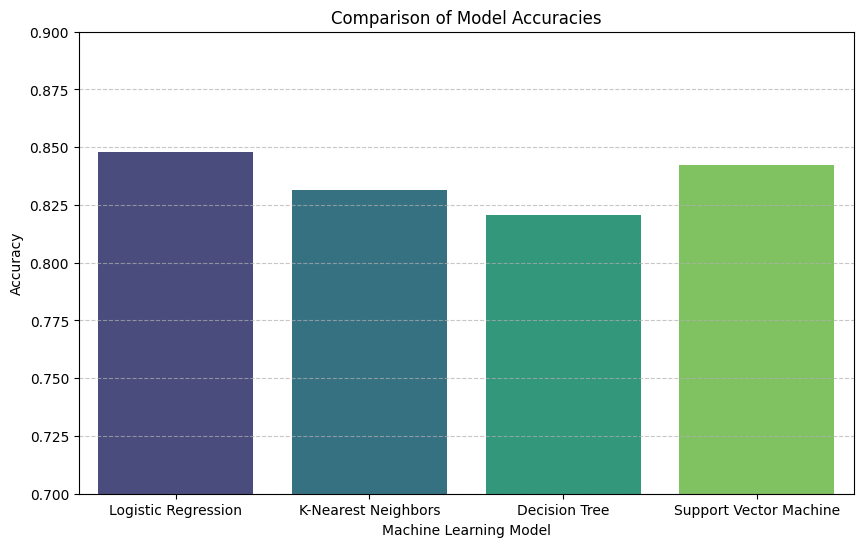

Model accuracies visualized successfully.


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Model accuracies visualized successfully.")

### Summary of Model Performance

The bar chart above clearly illustrates the accuracy of each classification model on the test dataset. From the visualization and the `accuracy_df` DataFrame, we can observe the following:

*   **Logistic Regression**: Achieved an accuracy of approximately 0.8478.
*   **K-Nearest Neighbors**: Achieved an accuracy of approximately 0.8315.
*   **Decision Tree**: Achieved an accuracy of approximately 0.8207.
*   **Support Vector Machine**: Achieved an accuracy of approximately 0.8424.

Based on these results, **Logistic Regression** is the best-performing algorithm among the four models tested, with the highest accuracy score.

## Summary:

### Q&A
The best-performing algorithm among the four tested classification models is Logistic Regression, achieving an accuracy of approximately 0.8478.

### Data Analysis Key Findings
*   The `df_encode` DataFrame was successfully split into features (`X`) and the target variable (`HeartDisease` as `y`), then further divided into training and testing sets (80% training, 20% testing).
*   The following classification models were trained and evaluated, yielding these accuracies:
    *   **Logistic Regression**: 0.8478
    *   **K-Nearest Neighbors (KNN)**: 0.8315
    *   **Support Vector Machine (SVM)**: 0.8424
    *   **Decision Tree**: 0.8207
*   Logistic Regression exhibited the highest accuracy among the evaluated models, making it the best performer in this comparison.

### Insights or Next Steps
*   Further hyperparameter tuning could be performed on the Logistic Regression model to potentially improve its accuracy.
*   Consider exploring other advanced classification algorithms (e.g., Random Forest, Gradient Boosting) to see if they can achieve even higher predictive performance.
